# 日夜图像分类器
---

日夜图像数据集由200个RGB彩色图像组成，分为两类：白天图像和夜晚图像。每个例子都有相同的数字：100个日图像和100个夜图像。

我们希望建立一个分类器，可以把这些图像准确地标记为白天或黑夜。要完成这个任务，我们需要找出这两种图像之间的显著性特征！

*注：所有图像都来自 [AMOS 数据集](http://cs.uky.edu/~jacobs/datasets/amos/) （众多户外场景档案）。*


### 导入资源

在开始使用项目代码之前，请导入你需要的库和资源。

In [1]:
import cv2 # computer vision library
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## 训练并测试数据
200张日/夜的图像被分成训练和测试数据集。

* 这些图像中的60％是训练图像，供你在创建分类器时使用。
* 另外40％是测试图像，将用于测试分类器的准确度。

首先，我们设置一些变量来跟踪图像的存储位置：

First, we set some variables to keep track of some where our images are stored:

image_dir_training: the directory where our training image data is stored
image_dir_test: the directory where our test image data is stored

In [2]:
# Image data directories
image_dir_training = "../day_night_images/training/"
image_dir_test = "../day_night_images/test/"

## 加载数据集

前几行代码将加载训练日/夜图像，并将它们全部存储在变量`IMAGE_LIST`中。 该列表包含图像及其相关标签（“日”或“夜”）。

例如， `IMAGE_LIST` 中的第一个图像标签对可以通过索引 ``` IMAGE_LIST[0][:]``` 访问。

In [3]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)


## 构建输入图像和输出标签的 `STANDARDIZED_LIST` 函数

该函数将输入一个图像标签对列表，并输出一个包含调整过的图像和数字标签的**标准**列表。

In [4]:
# Standardize all training images
STANDARDIZED_LIST = helpers.standardize(IMAGE_LIST)

## 将标准化数据可视化

显示一个来自STANDARDIZED_LIST的标准化图片。

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


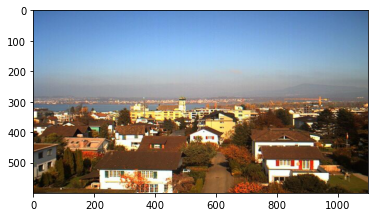

In [5]:
# Display a standardized image and its label

# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))


# 特征提取

创建一个表示图像亮度的特征。我们将使用HSV颜色空间提取**平均亮度**。具体来说，我们将使用V通道（亮度测量），将V通道中的像素值相加，然后将该总和除以图像的面积，从而获得该图像的平均值。


## 从 RGB 转换为 HSV

在下方，一张测试图片被从 RGB 转换为 HSV 颜色空间，其中每个元素都用一张图片显示。

Label: 1


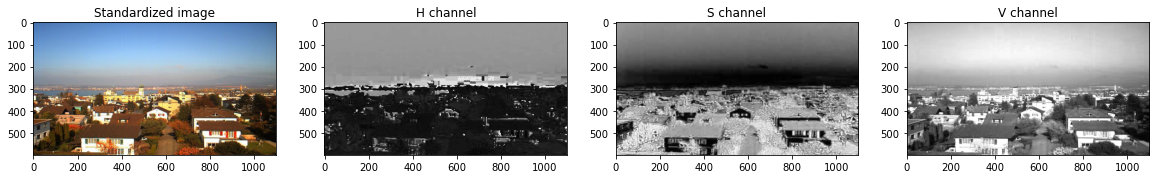

In [6]:
# Convert and image to HSV colorspace
# Visualize the individual color channels

image_num = 0
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

# Convert to HSV
hsv = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

# Print image label
print('Label: ' + str(test_label))

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Plot the original image and the three channels
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')


---
###  使用V通道查找平均亮度

该函数会输入**标准化**的RGB图像并返回一个代表图像亮度平均水平的特征（单个值）。我们将使用此值将图像分类为白天或夜晚。

In [11]:
print(hsv.shape[0], hsv.shape[1])

600 1100


In [12]:
# Find the average Value or brightness of an image
def avg_brightness(rgb_image):
    
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])
    
    ## TODO: Calculate the average brightness using the area of the image
    # and the sum calculated above
    avg = sum_brightness/(hsv.shape[0]*hsv.shape[1])
    
    return avg

Avg brightness: 128.12541515151514


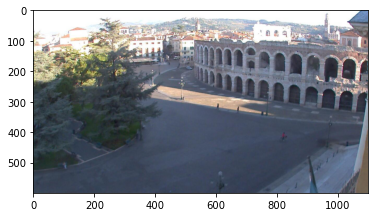

In [13]:
# Testing average brightness levels
# Look at a number of different day and night images and think about 
# what average brightness value separates the two types of images

# As an example, a "night" image is loaded in and its avg brightness is displayed
image_num = 2
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)